# Lab №2

## Execution

### 0. Importing necessary libraries

In [118]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Load the Manipulator Model

In [119]:
robot = rtb.models.DH.Mico()
print(robot)

DHRobot: Mico (by Kinova), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────────────┬──────────┬──────┬────────────────────┐
│     θⱼ     │    dⱼ    │  aⱼ  │         ⍺ⱼ         │
├────────────┼──────────┼──────┼────────────────────┤
│ -q1        │   0.2755 │    0 │              90.0° │
│  q2 - 90°  │        0 │ 0.29 │             180.0° │
│  q3 + 90°  │   -0.007 │    0 │              90.0° │
│  q4        │  -0.1661 │    0 │ 59.99999999999999° │
│  q5 - 180° │ -0.08556 │    0 │ 59.99999999999999° │
│  q6 + 100° │  -0.2028 │    0 │             180.0° │
└────────────┴──────────┴──────┴────────────────────┘

┌──┬──┐
└──┴──┘

┌──────┬───────┬───────┬───────┬─────┬─────┬─────┐
│ name │ q0    │ q1    │ q2    │ q3  │ q4  │ q5  │
├──────┼───────┼───────┼───────┼─────┼─────┼─────┤
│   qr │  270° │  180° │  180° │  0° │  0° │  0° │
│   qz │  0°   │  0°   │  0°   │  0° │  0° │  0° │
└──────┴───────┴───────┴───────┴─────┴─────┴─────┘



In [120]:
# Mass of links
robot.links[0].m = 0.75    # Base
robot.links[1].m = 1.2     # Shoulder
robot.links[2].m = 0.9     # Elbow
robot.links[3].m = 0.5     # Wrist 1
robot.links[4].m = 0.3     # Wrist 2
robot.links[5].m = 0.2     # End-effector

# Center of mass for each link
robot.links[0].r = [0, 0, 0.1]    
robot.links[1].r = [0.15, 0, 0.2]
robot.links[2].r = [0.2, 0, 0]
robot.links[3].r = [0, 0, 0.05]
robot.links[4].r = [0, 0, 0.03]
robot.links[5].r = [0, 0, 0.02]

# Inertia tensor for each link: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]
robot.links[0].I = [0.05, 0.05, 0.01, 0, 0, 0]
robot.links[1].I = [0.1, 0.1, 0.02, 0, 0, 0]
robot.links[2].I = [0.03, 0.03, 0.01, 0, 0, 0]
robot.links[3].I = [0.005, 0.005, 0.002, 0, 0, 0]
robot.links[4].I = [0.003, 0.003, 0.001, 0, 0, 0]
robot.links[5].I = [0.001, 0.001, 0.0005, 0, 0, 0]

# Drive moment of inertia
robot.links[0].Jm = 0.0001
robot.links[1].Jm = 0.0001
robot.links[2].Jm = 0.0001
robot.links[3].Jm = 0.00005
robot.links[4].Jm = 0.00005
robot.links[5].Jm = 0.00005

# Viscous friction coefficient
robot.links[0].B = 0.1 
robot.links[1].B = 0.1
robot.links[2].B = 0.08
robot.links[3].B = 0.05
robot.links[4].B = 0.05
robot.links[5].B = 0.03

# Coulomb friction coefficient
robot.links[0].Tc = [0.15, -0.15]
robot.links[1].Tc = [0.2, -0.2]
robot.links[2].Tc = [0.15, -0.15]
robot.links[3].Tc = [0.1, -0.1]
robot.links[4].Tc = [0.08, -0.08]
robot.links[5].Tc = [0.05, -0.05]

# Gear ratio
robot.links[0].G = 80
robot.links[1].G = 100
robot.links[2].G = 100
robot.links[3].G = 50
robot.links[4].G = 50
robot.links[5].G = 30

# Joint limits
robot.links[0].qlim = [-pi, pi]
robot.links[1].qlim = [-pi/2, pi/2]
robot.links[2].qlim = [-pi/2, pi/2]
robot.links[3].qlim = [-pi, pi]
robot.links[4].qlim = [-pi, pi]
robot.links[5].qlim = [-pi, pi]

### 2. Set an Arbitrary Initial Configuration for the Robot

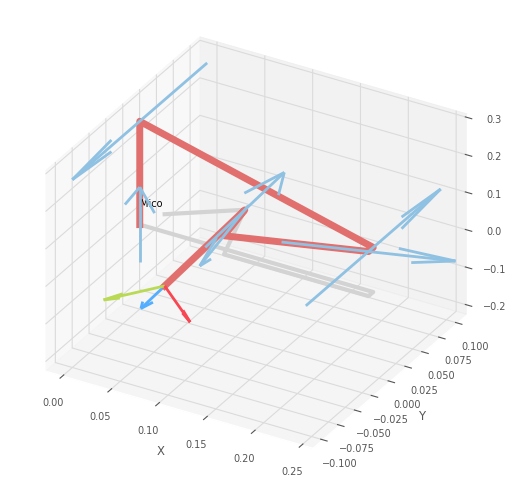

<Figure size 640x480 with 0 Axes>

In [121]:
q_start = [0, 1, -1, -0.5, 1, 0.7]  # Same as Lab #1
robot.plot(q_start)
plt.show()

### 3. Solve Forward Kinematics for Initial Configuration

In [122]:
T_start = robot.fkine(q_start)
print(T_start)

   0.8256   -0.4841   -0.2899    0.0101    
  -0.543    -0.8214   -0.1747    0.02261   
  -0.1536    0.3017   -0.941    -0.1912    
   0         0         0         1         



### 4. Construct Manipulator's Workspace

Initialize variables

In [123]:
n = 10  # Number of points per joint
i = 0  
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(6)] 
pose = np.zeros([3,n**6])  

Calculate workspace points

In [124]:
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            for q4 in move[3]:
                for q5 in move[4]:
                    for q6 in move[5]:
                        Tt = robot.fkine([q1, q2, q3, q4, q5, q6])
                        for j in range(3):
                            pose[j][i] = Tt.t[j]
                        i += 1

Plot workspace

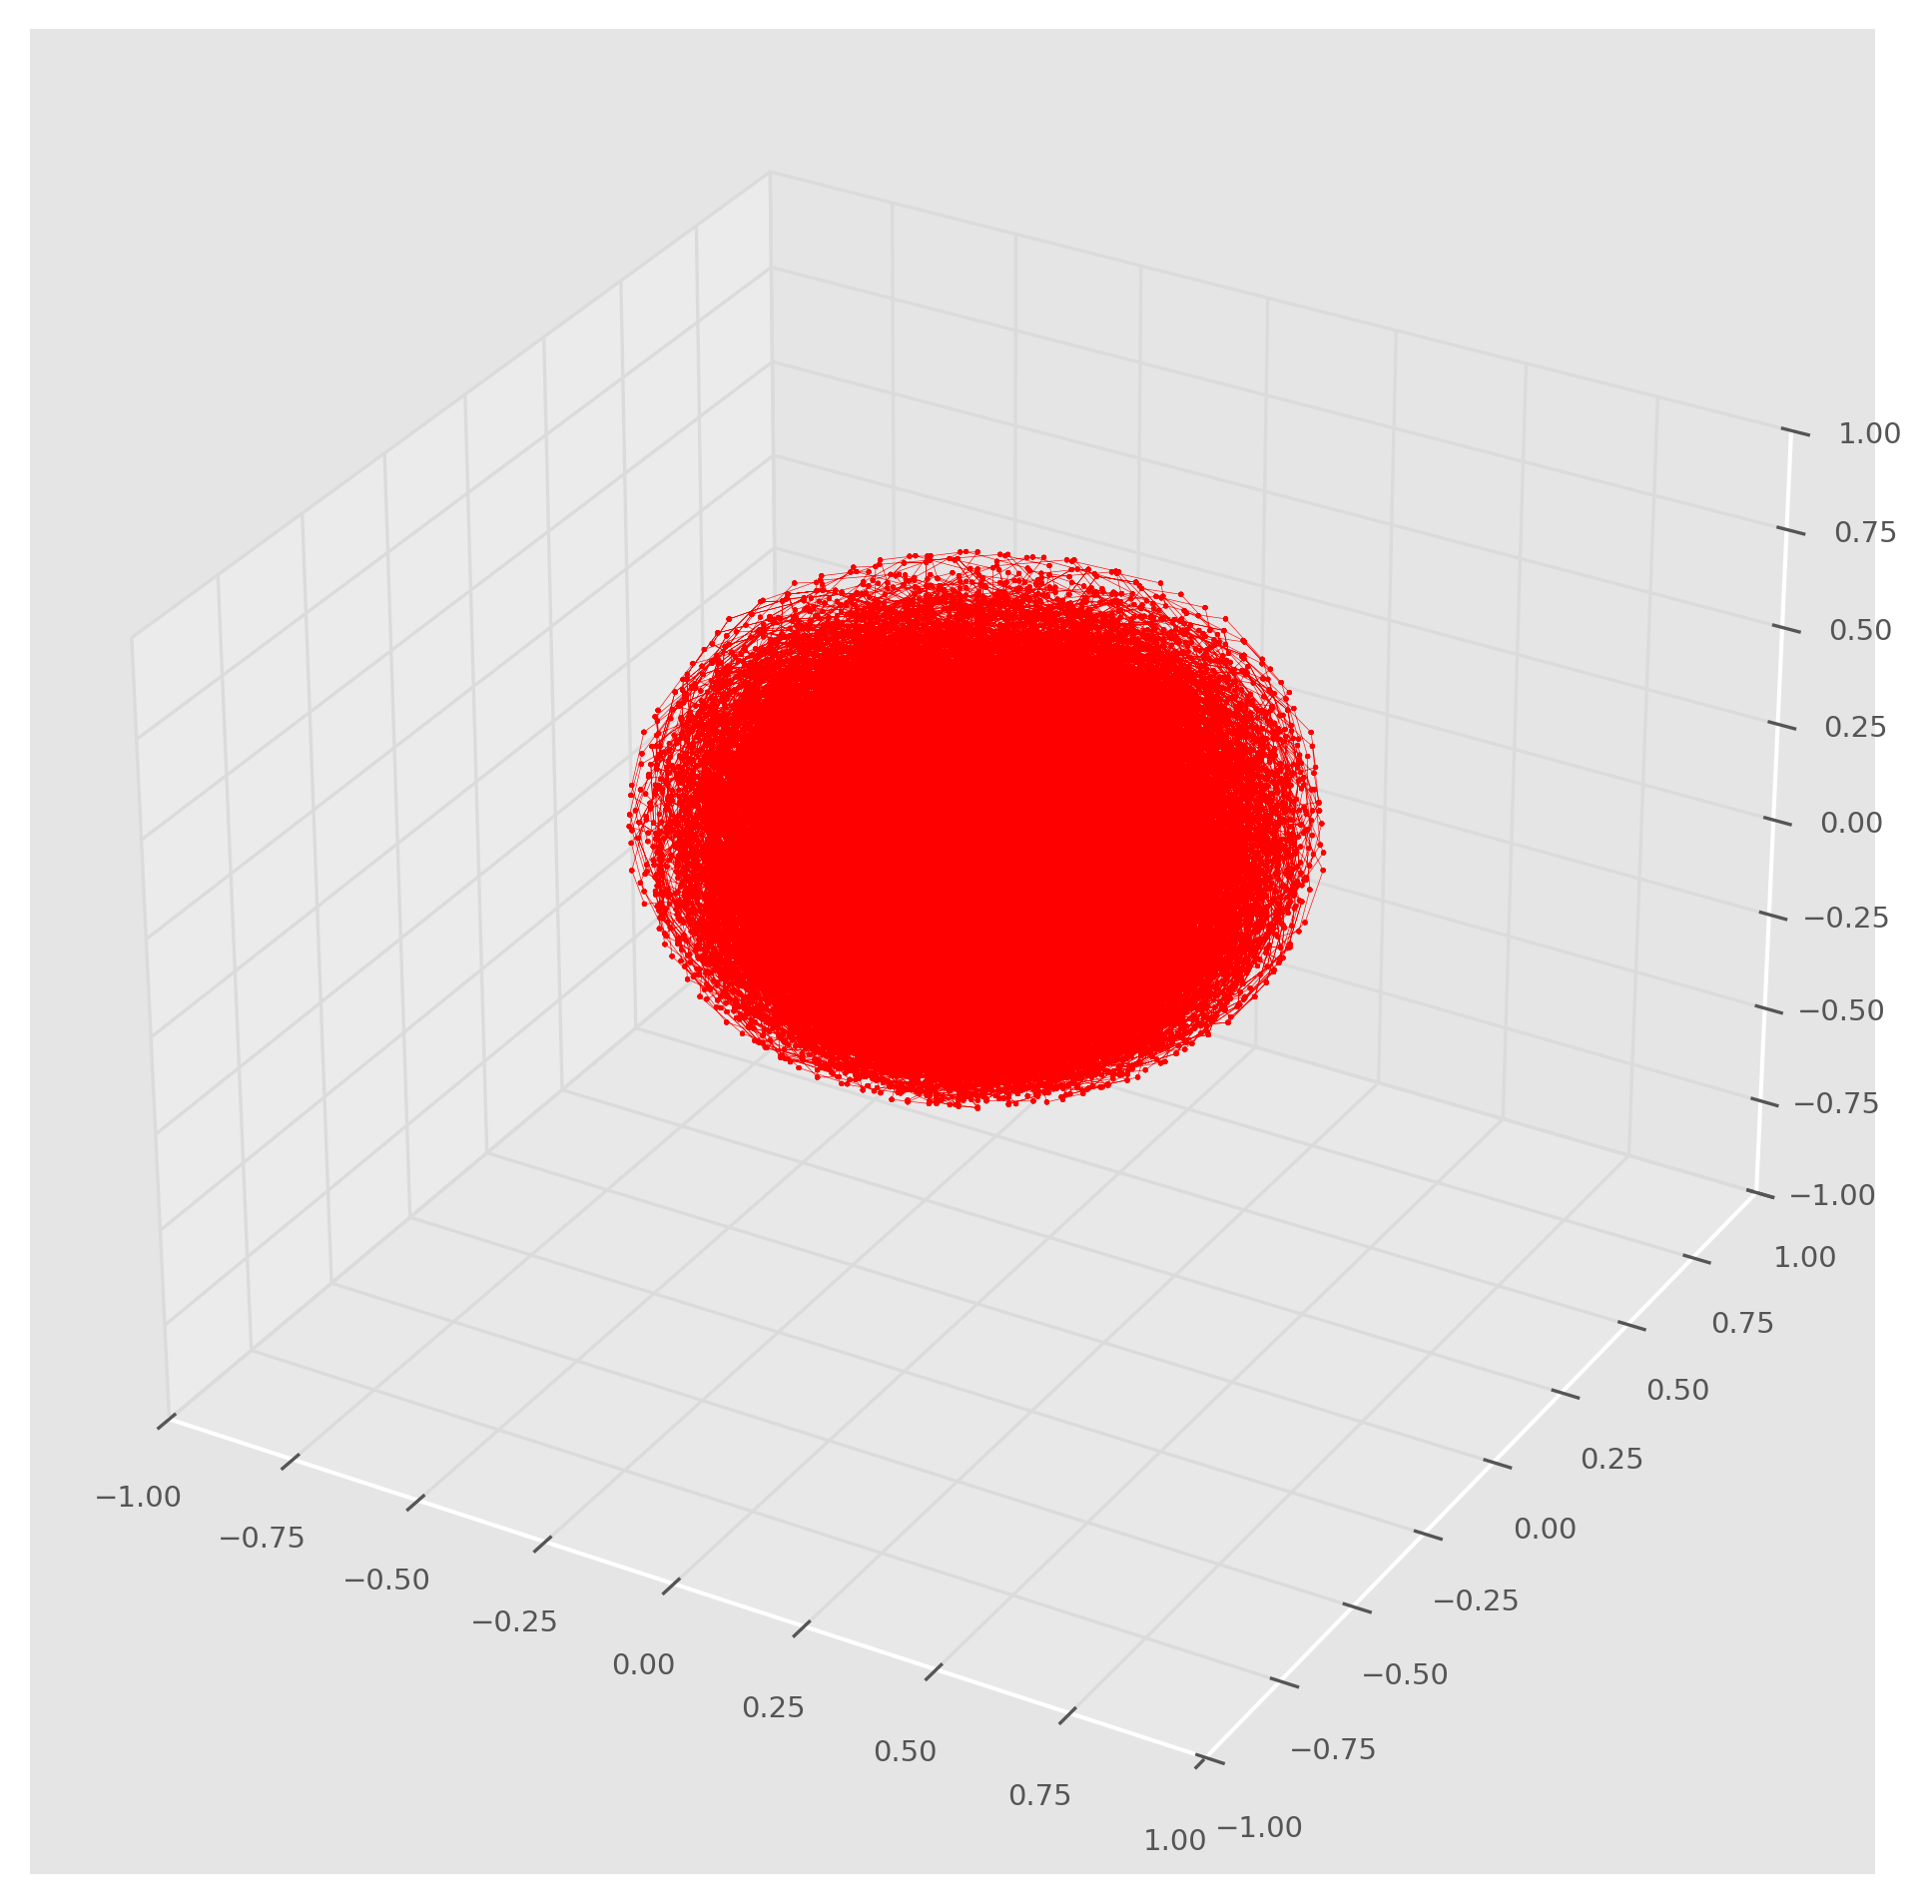

In [125]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 5. Select end point and solve inverse kinematics

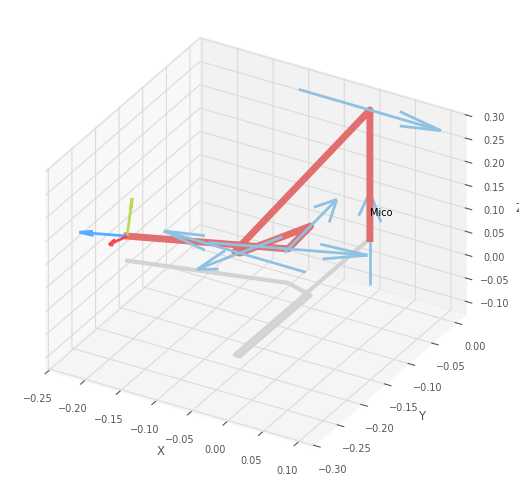

<Figure size 640x480 with 0 Axes>

In [126]:
point = [0.0101, 0.02261, -0.1912]  # Target position within workspace
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q
robot.plot(q_end)
plt.show()

### 6. Plan trajectory between points

Let's plan a trajectory using the 'jtraj' method for $N$ = 100 points

In [127]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Let's plan the same trajectory using the 'mtraj' method with the 'trapezoidal' function

In [128]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

We will plan the same trajectory using the 'mtraj' method with the 'quintic' function.

In [129]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 7. Let's plot the graphs

Let's plot the position graphs for each link

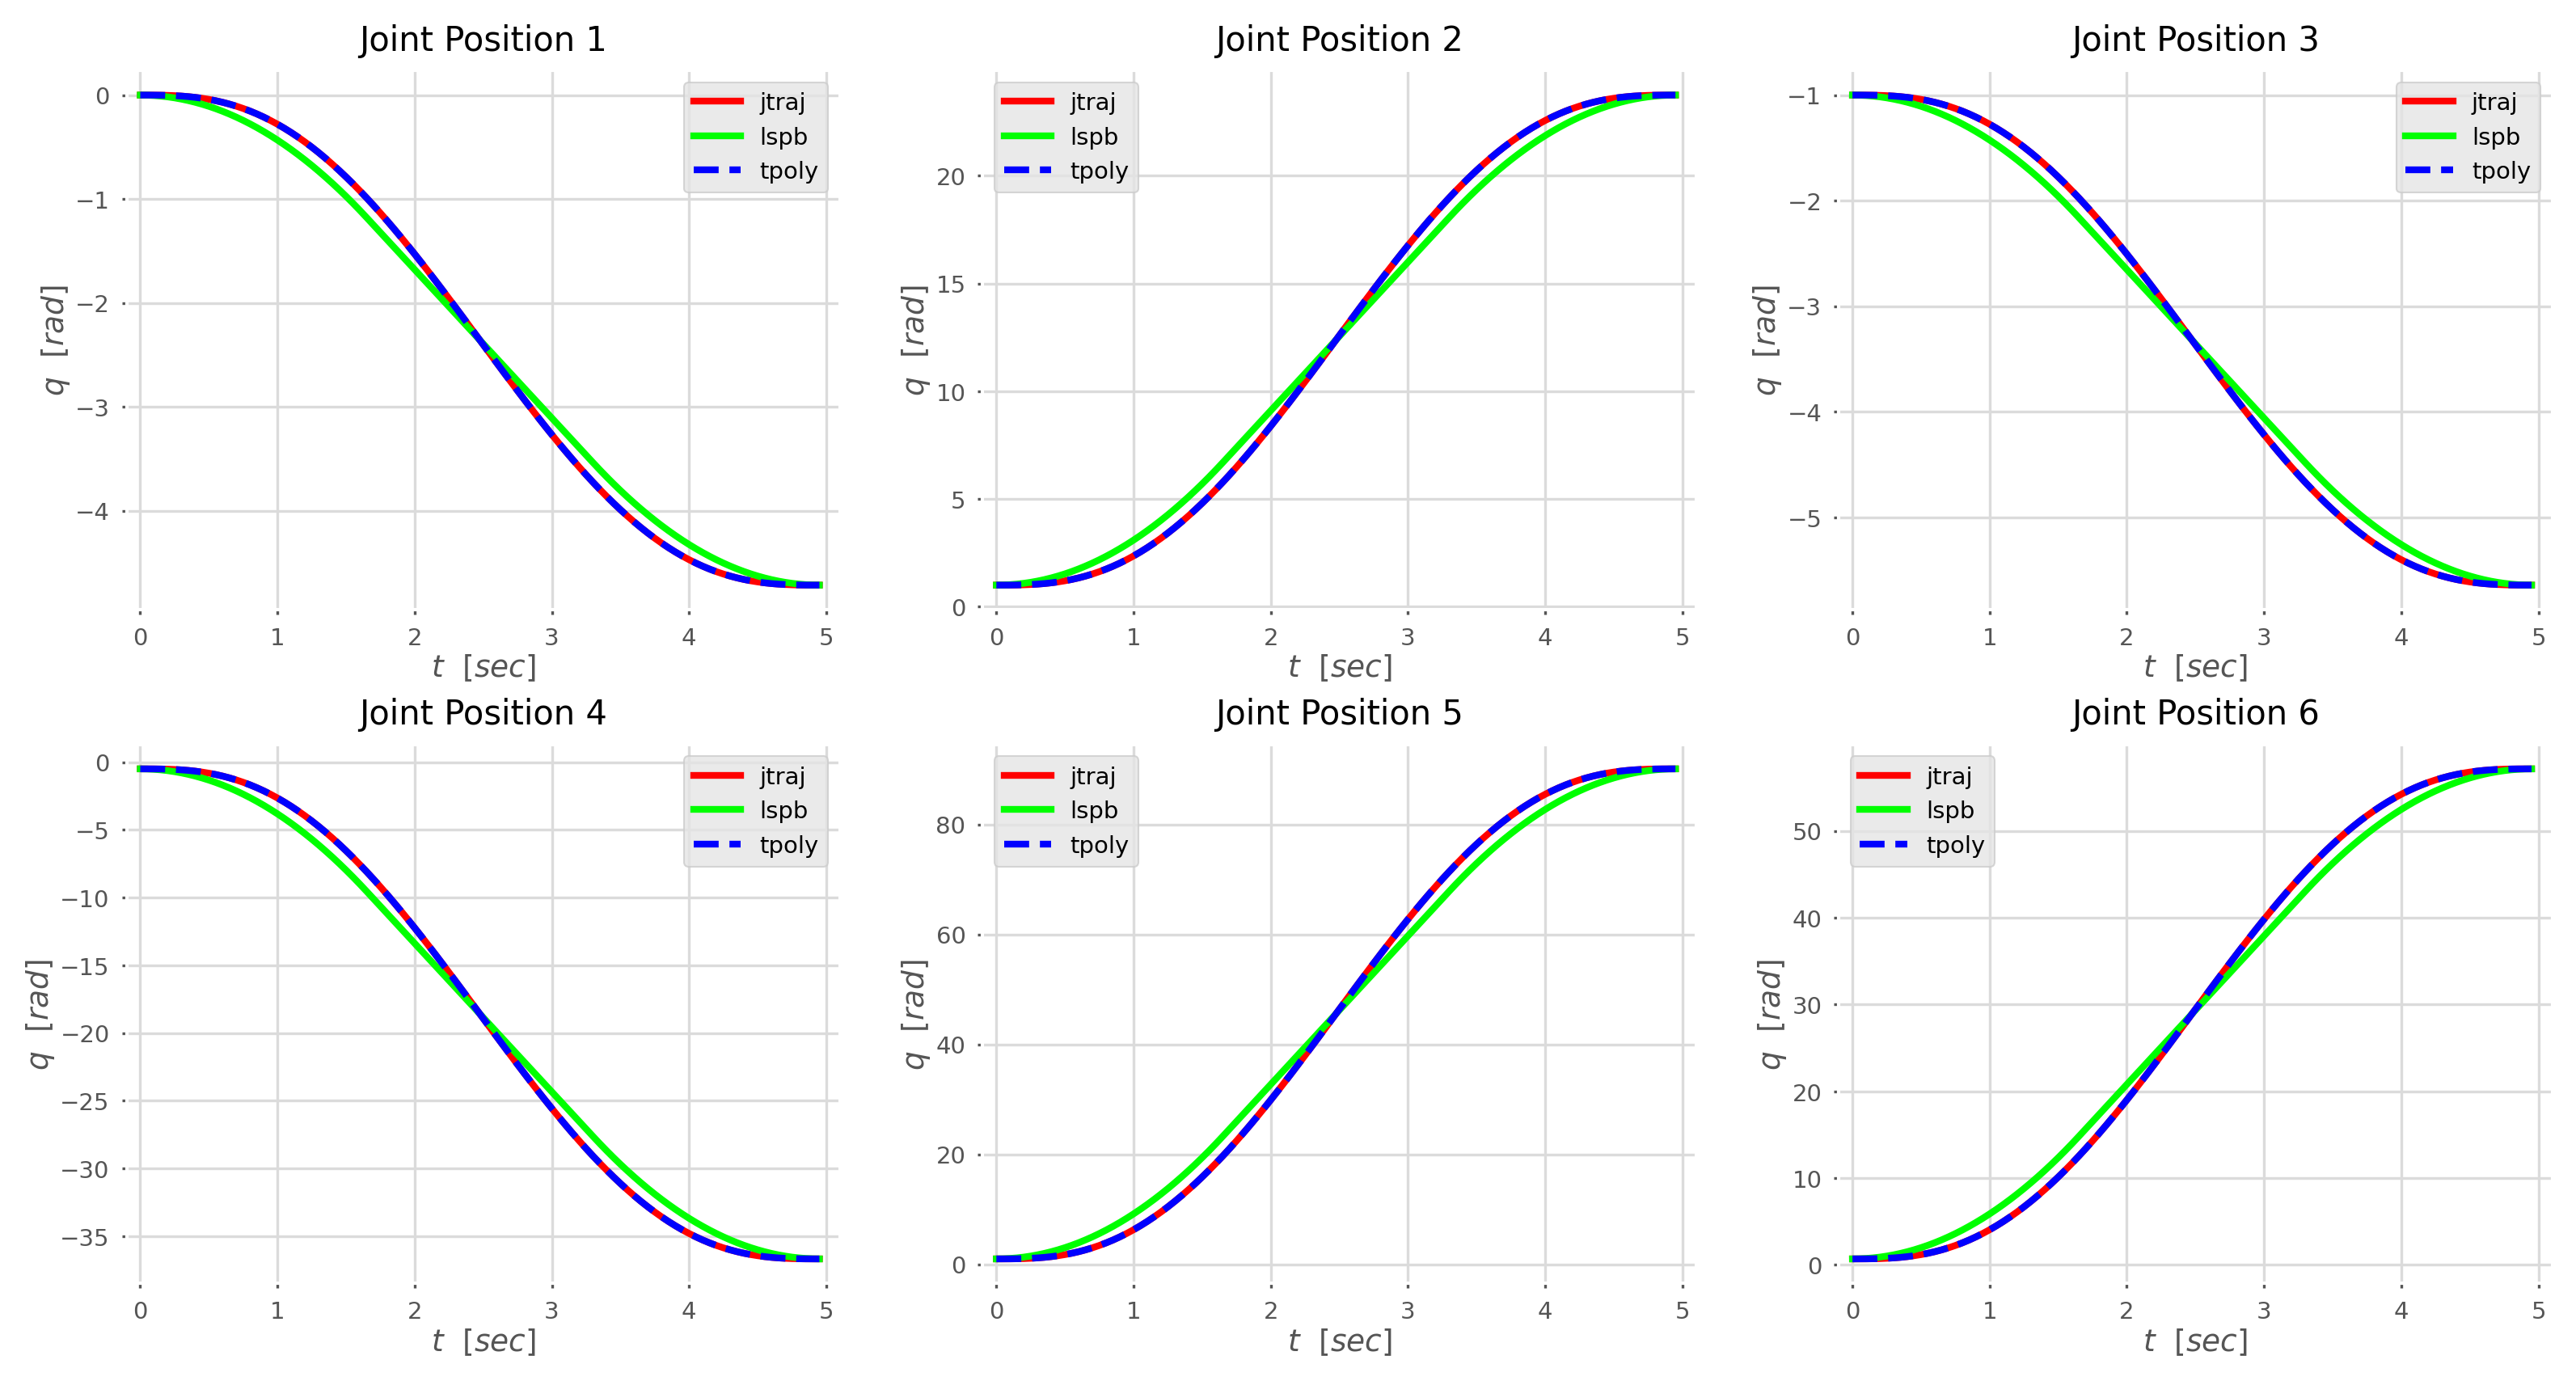

In [130]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Joint Position {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()


Let's plot the speed graphs for each link

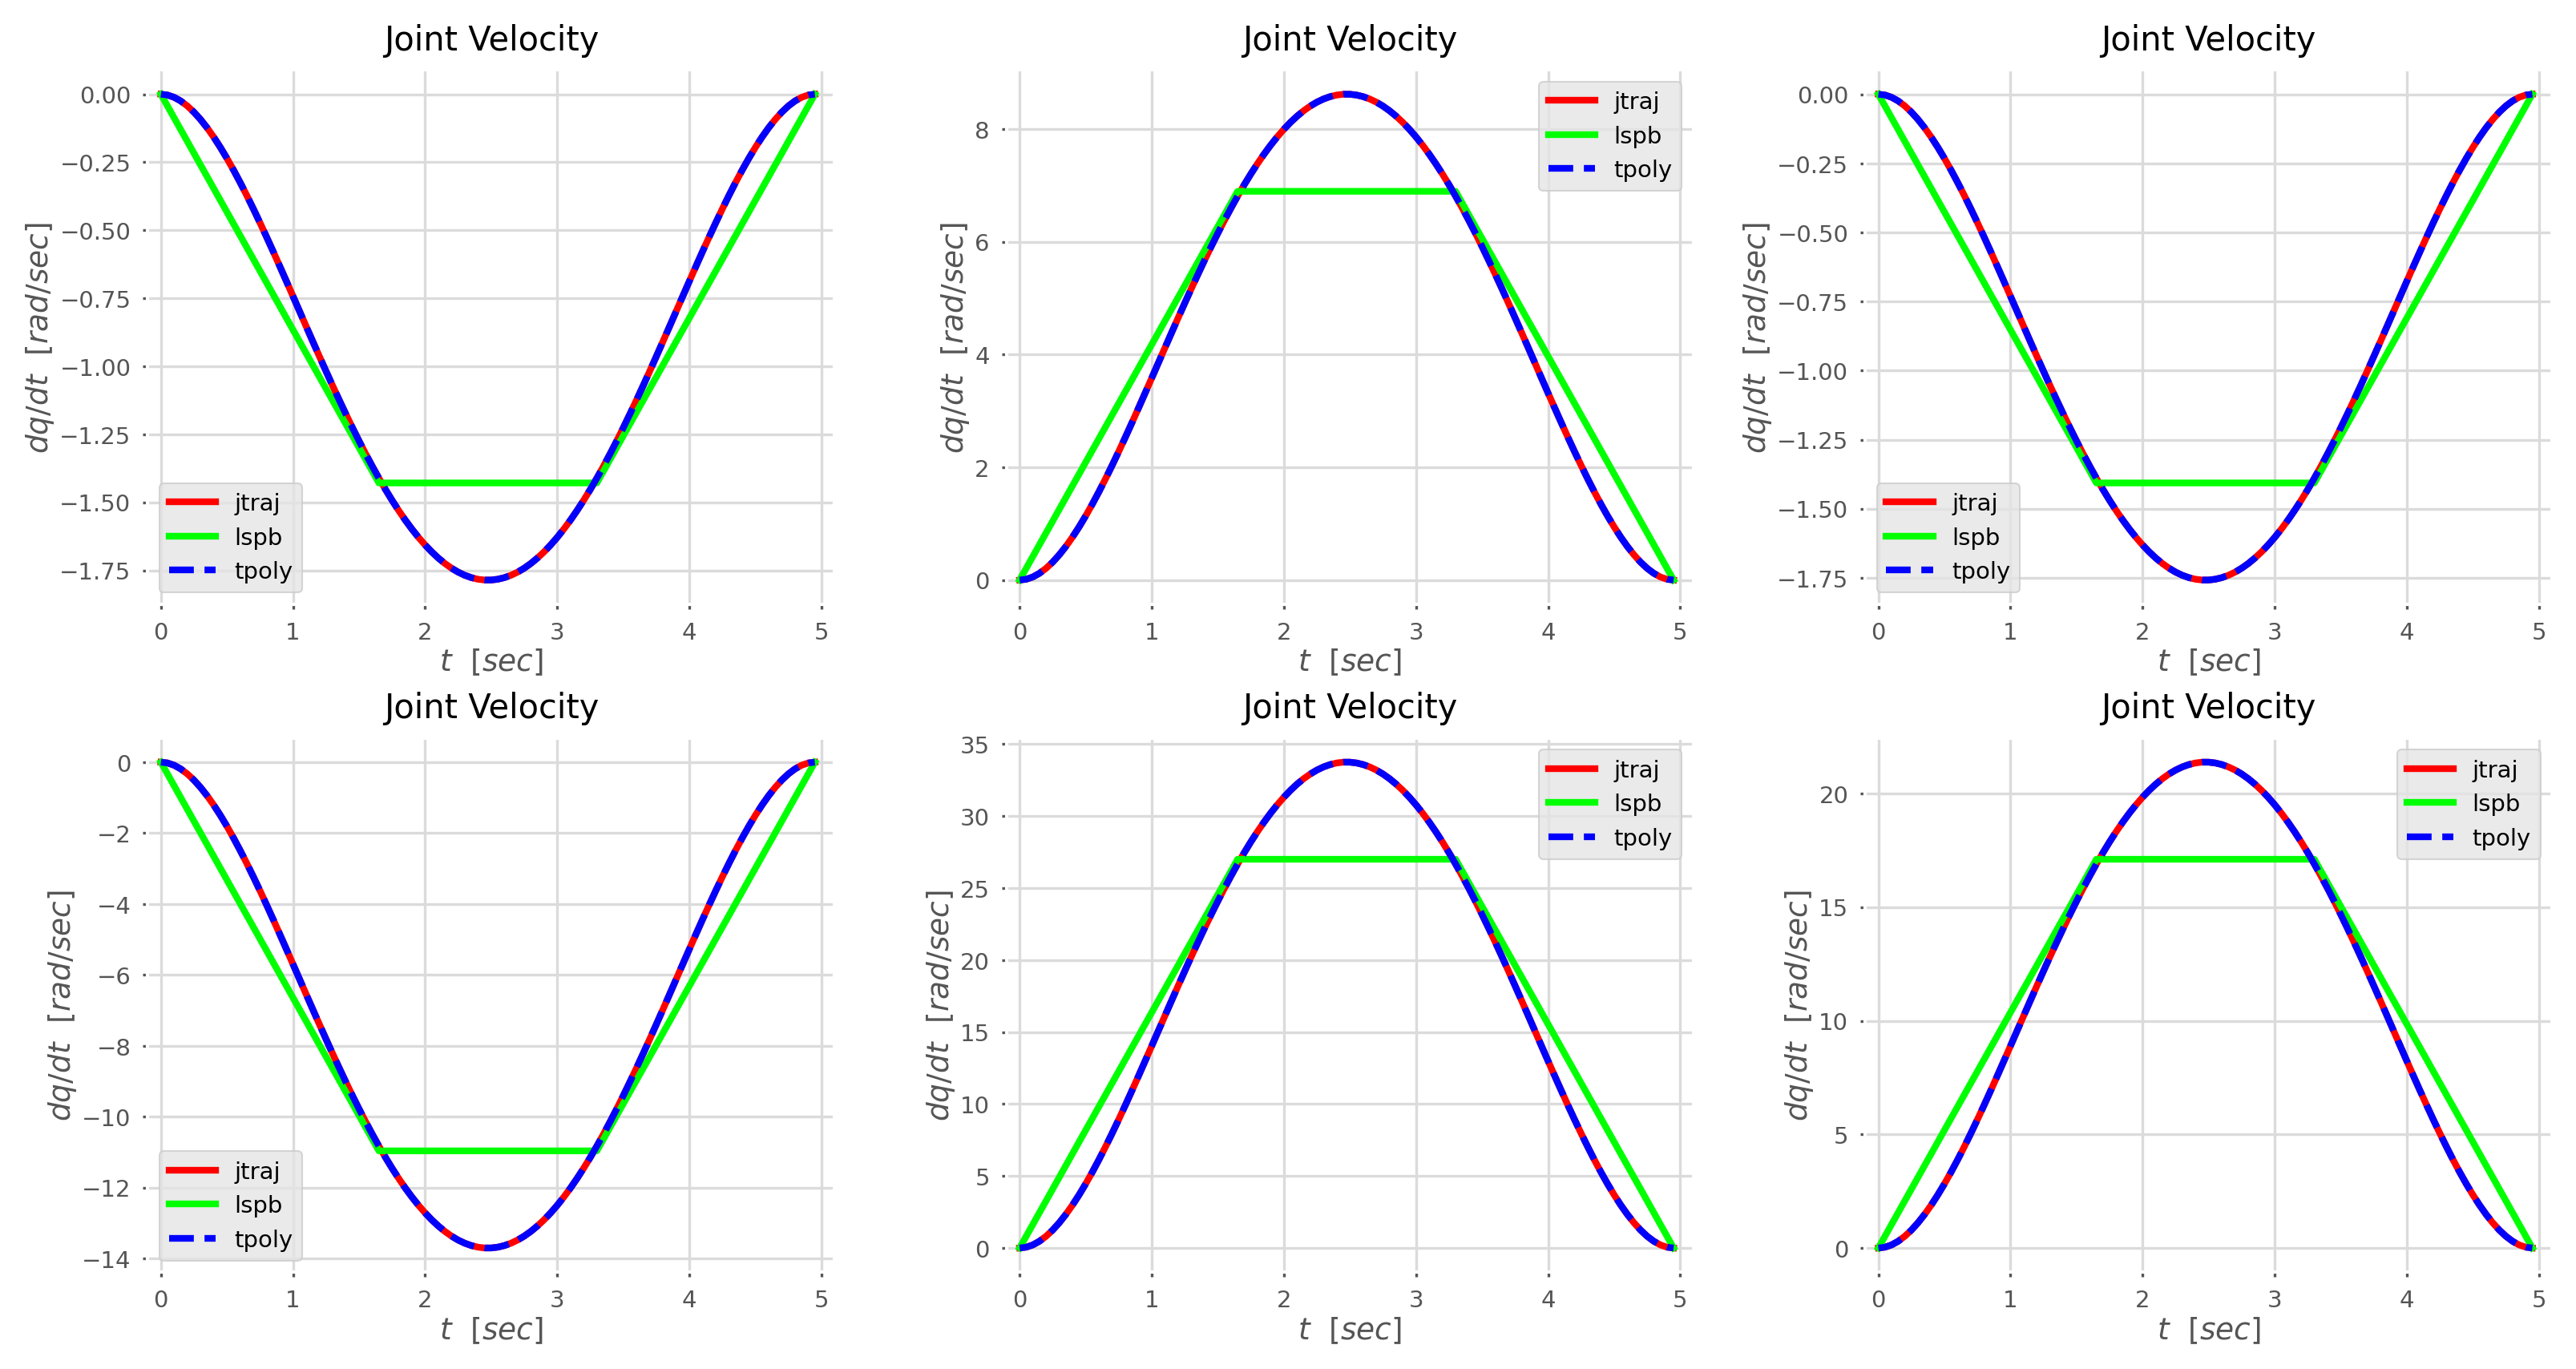

In [131]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Joint Velocity".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Let's plot acceleration graphs for each link

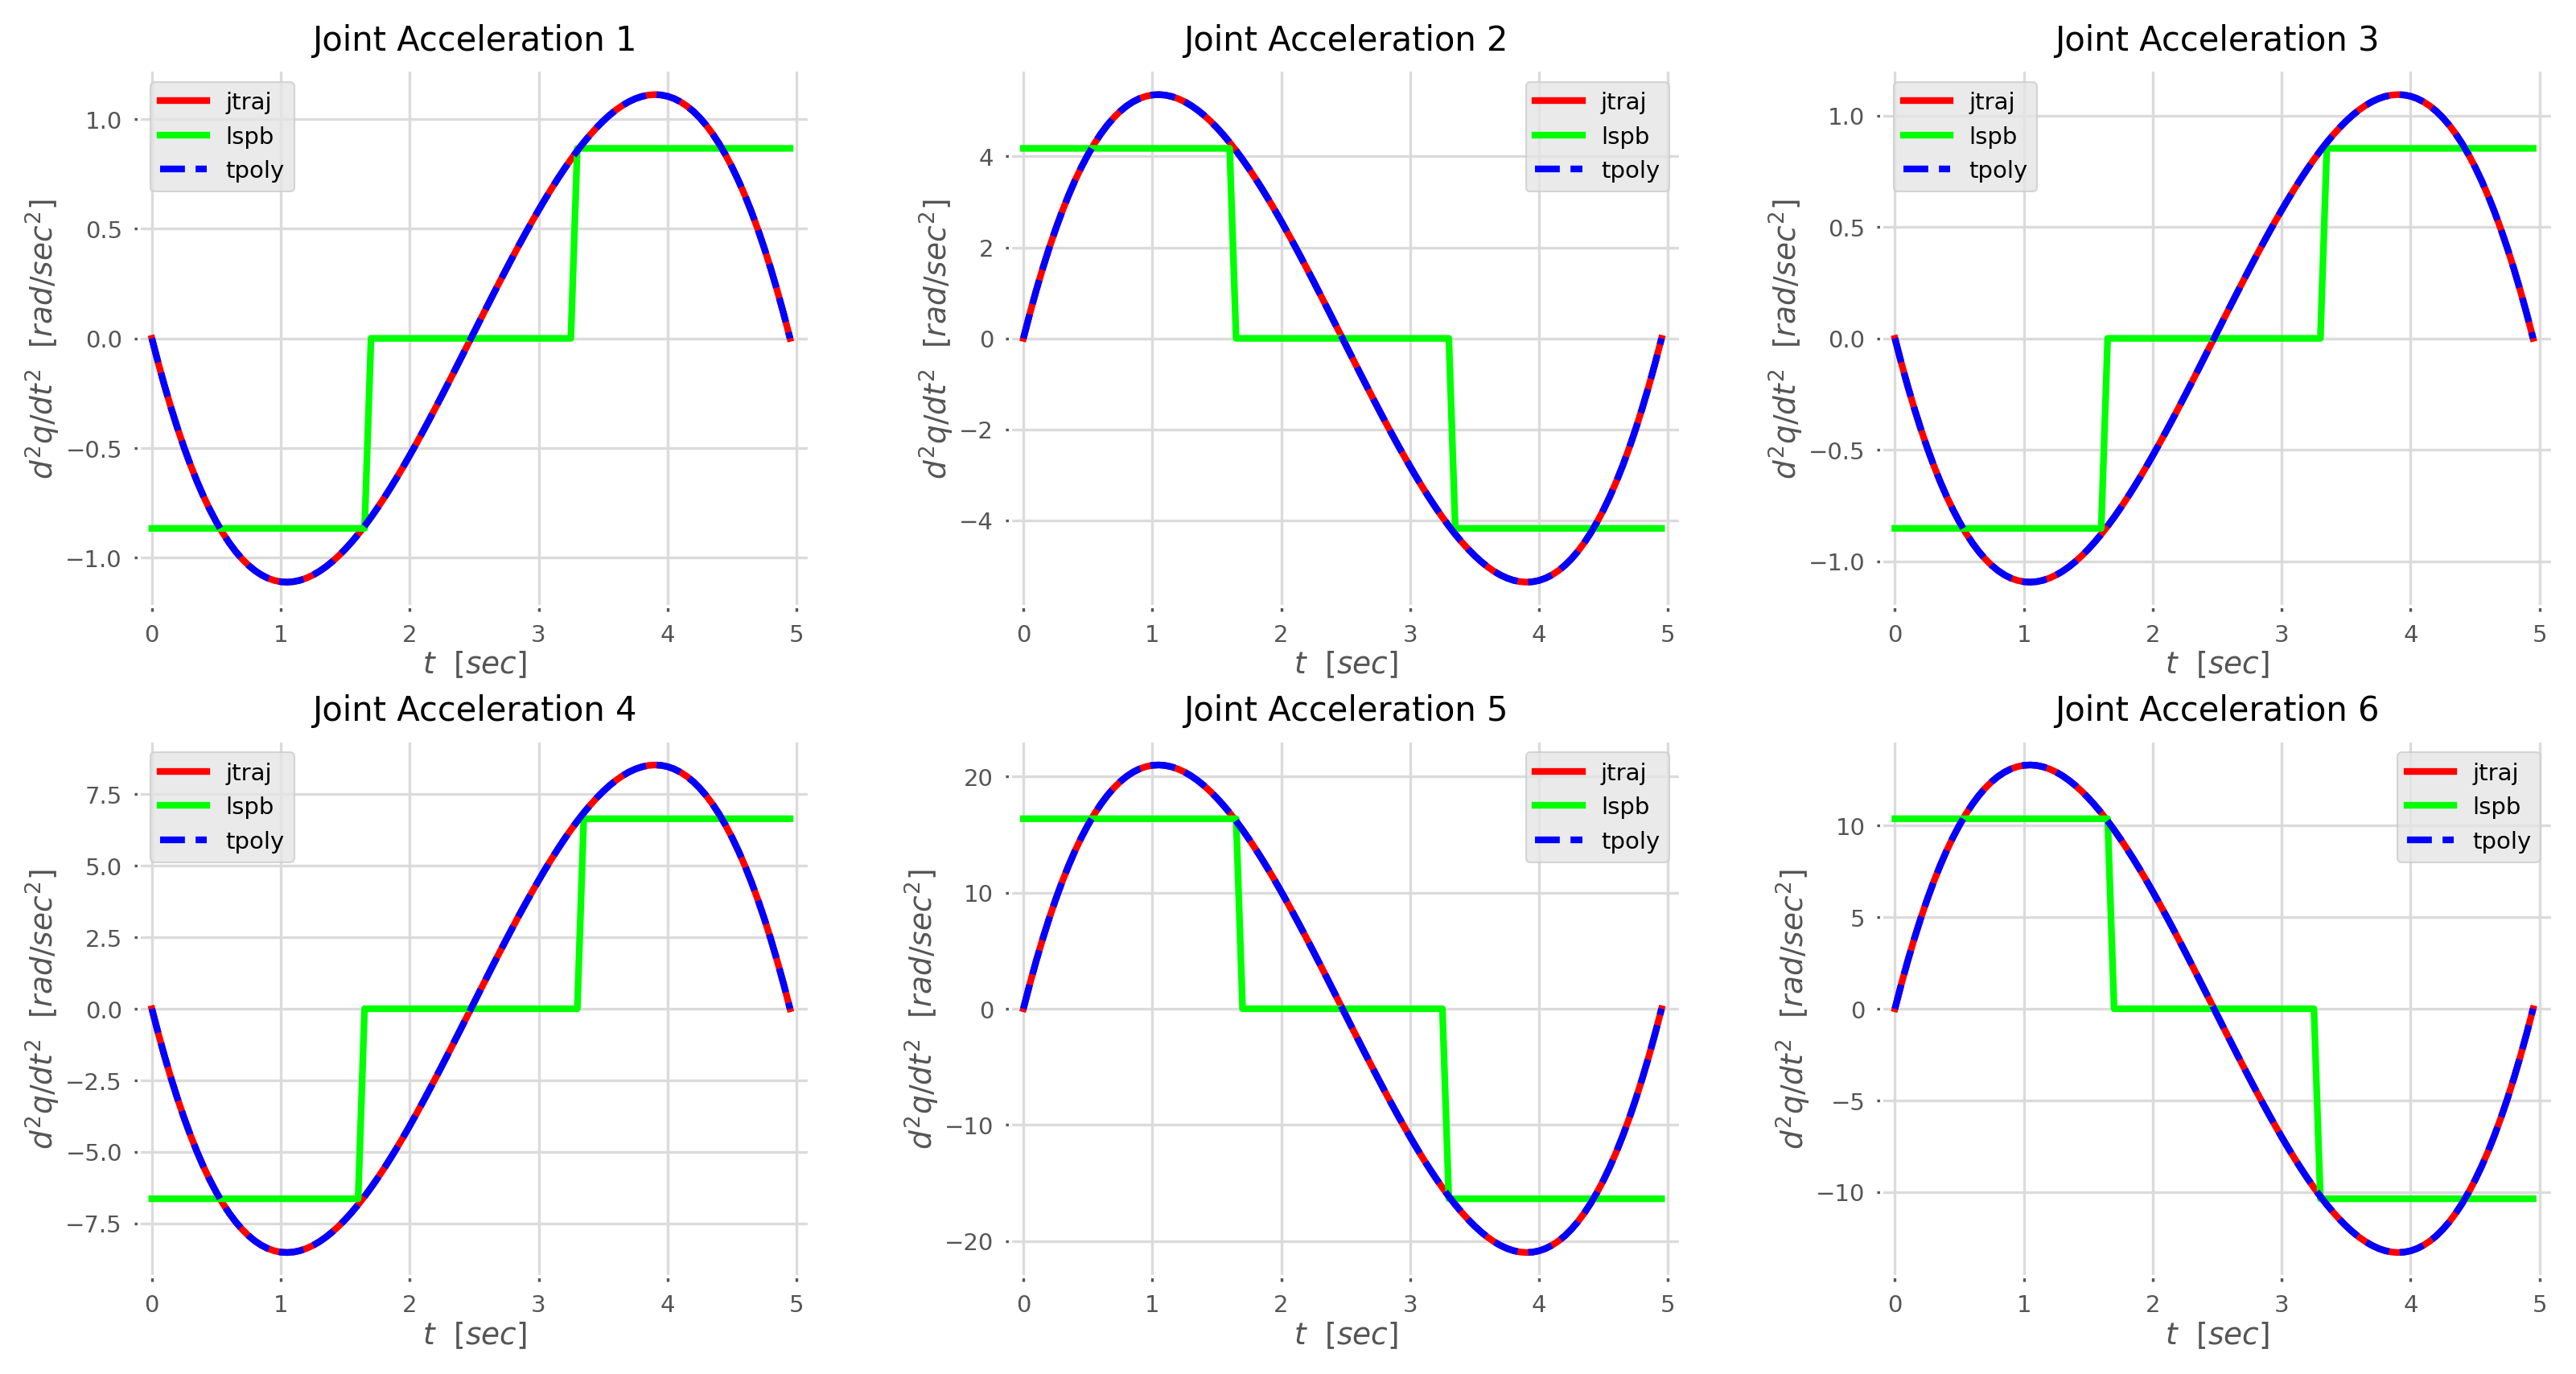

In [132]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Joint Acceleration {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

we can observe the differences between the three trajectory generation methods: jtraj, lspb, and quintic. All three successfully guide the robot from the starting configuration to the target pose, but they differ in smoothness and motion quality.

In the position graphs, all methods produce smooth joint trajectories, but quintic stands out with the smoothest curves, while lspb shows more linear segments due to its trapezoidal velocity profile. jtraj also performs well but has slightly sharper transitions in some joints.

Looking at the velocity graphs, quintic again delivers the smoothest and most continuous velocity changes, which is ideal for minimizing sudden motions or stress on the joints. lspb has distinct flat regions representing constant velocity, while jtraj shows more abrupt changes in slope, which could translate to slightly jerkier movements.

Finally, the acceleration graphs make the differences even clearer. quintic maintains smooth acceleration throughout, which is excellent for reducing wear and ensuring precise control. In contrast, lspb and jtraj exhibit sharper changes in acceleration, with lspb showing clear jumps due to its piecewise nature.

In summary, while all three methods achieve the goal, quintic provides the best overall performance in terms of smoothness and continuity, making it the most suitable choice for applications that require precision and gentle motion, such as in delicate manipulation tasks or when minimizing mechanical stress is important.